<a href="https://colab.research.google.com/github/Bena-29/DATA-SCIENCE/blob/main/KEMIGISHA_BENADINE_EXAM_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**IMPORTING LIBRARIES**

In [ ]:
###importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
###mouting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

##importing the datset
data=pd.read_csv('/content/drive/MyDrive/loan_data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
##checking for missing values
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


##**PRE PROCESSING**

In [ ]:
##Tagets and features
y=data['Loan_Status']
x=data.drop('Loan_Status',axis=1)
x=x.drop('Loan_ID',axis=1)


print(y.shape)
print(x.shape)

(614,)
(614, 11)


In [ ]:
#####changing the loan status colum into binary column,where 1 represents yes and 0 represents no
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [ ]:
##splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


**IMPUTING FOR MISSING VALUES**

In [ ]:
##checking for misssing values
x_train[['LoanAmount', 'Loan_Amount_Term']].isnull().sum()

,0
LoanAmount,16
Loan_Amount_Term,12


In [ ]:
##1.MISSING VALUES FOR NUMERICAL DATA
# Create an imputer object with the median strategy
imputer_median = SimpleImputer(strategy='median')

# Impute the missing values in 'LoanAmount' and 'Loan_Amount_Term' in the training data and testing data
x_train[['LoanAmount', 'Loan_Amount_Term']] = imputer_median.fit_transform(x_train[['LoanAmount', 'Loan_Amount_Term']])

x_test[['LoanAmount', 'Loan_Amount_Term']] = imputer_median.transform(x_test[['LoanAmount', 'Loan_Amount_Term']])
##checking gain for the missing variables
x_train[['LoanAmount', 'Loan_Amount_Term']].isnull().sum()

,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
###2. F0R CATEGORICAL DATA
##Checkinf foemisssing categorical data
x_train[['Dependents', 'Credit_History', 'Education', 'Gender', 'Property_Area', 'Married']].isnull().sum()

,0
Dependents,11
Credit_History,40
Education,0
Gender,12
Property_Area,0
Married,1


In [ ]:

## using the simple imputer ,using mode as the strategy

imputer_mode = SimpleImputer(strategy='most_frequent')

# Impute the missing values in the specified columns in the training data
x_train[['Dependents', 'Credit_History', 'Education', 'Gender', 'Property_Area', 'Married']] = imputer_mode.fit_transform(x_train[['Dependents', 'Credit_History', 'Education', 'Gender', 'Property_Area', 'Married']])

# Impute the missing values in the specified columns in the test data using the same imputer
x_test[['Dependents', 'Credit_History', 'Education', 'Gender', 'Property_Area', 'Married']] = imputer_mode.transform(x_test[['Dependents', 'Credit_History', 'Education', 'Gender', 'Property_Area', 'Married']])
##verifying for missing data
x_train[['Dependents', 'Credit_History', 'Education', 'Gender', 'Property_Area', 'Married']].isnull().sum()

,0
Dependents,0
Credit_History,0
Education,0
Gender,0
Property_Area,0
Married,0


In [ ]:
#changing the dependents column to number
x_train['Dependents'] = x_train['Dependents'].replace('3+', 3)
x_test['Dependents'] = x_test['Dependents'].replace('3+', 3)

# Convert the column to numeric
x_train['Dependents'] = pd.to_numeric(x_train['Dependents'])
x_test['Dependents'] = pd.to_numeric(x_test['Dependents'])

In [ ]:
### USING THE ONE HOT ENCODER FOR THE CATEGORICAL VARIABLES
from sklearn import set_config
set_config(transform_output='pandas')


In [ ]:
# Select categorical columns for one-hot encoding
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
##One hot encoding
# saving list of categorical features to one-hot-encode
ohe_cols = categorical_cols
ohe_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [ ]:
# Instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit the OneHotEncoder on the training data
ohe_encoder.fit(x_train[ohe_cols])
## Transformming the training and testing data
x_train_ohe = ohe_encoder.transform(x_train[ohe_cols])
x_test_ohe = ohe_encoder.transform(x_test[ohe_cols])

In [ ]:
x_train_ohe

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
83,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
90,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
227,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
482,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
464,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
106,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
270,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
435,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_test_ohe

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
350,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
377,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
163,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
609,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
132,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
312,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
248,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
###Combining the imputed numerical and categorical varibaes for the x train and x test
numerical_cols_final = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
###combinig the numerical and one hot encoded categorical variables for  both the x train and x test
x_train_processed = pd.concat([x_train[numerical_cols_final], x_train_ohe], axis=1)
x_test_processed = pd.concat([x_test[numerical_cols_final], x_test_ohe], axis=1)




##**DATA MODELLING**

##**TASK 1:USING THE DECISION TREE CLASSIFIER**

In [ ]:
from sklearn import set_config
set_config(transform_output="default")
# Define numerical and categorical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Create transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline including preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])
# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'Dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
##Testing the data the model
test_preds = pipeline.predict(x_test)
test_preds


array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y'], dtype=object)

              precision    recall  f1-score   support

           N       0.59      0.47      0.52        43
           Y       0.74      0.82      0.78        80

    accuracy                           0.70       123
   macro avg       0.66      0.65      0.65       123
weighted avg       0.69      0.70      0.69       123



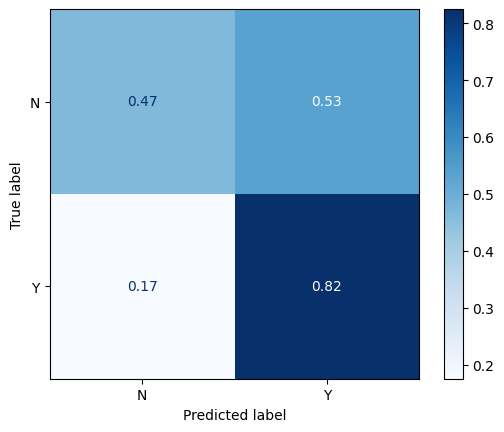

In [ ]:
## Evaluating the model  using metrics and the confusion matix
print(classification_report(y_test, test_preds))
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')



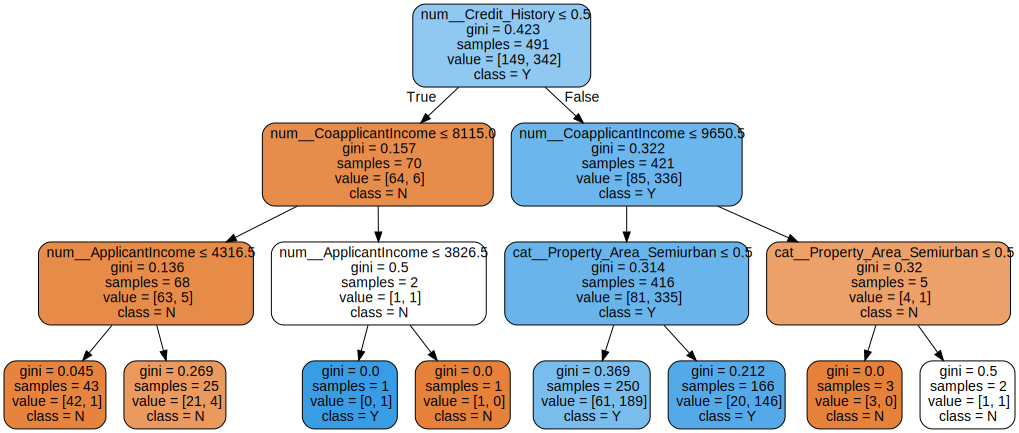

In [ ]:
###visualising the decison tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import set_config
set_config(transform_output='pandas')


# Define numerical and categorical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Create transformers for preprocessing
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline including preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=3))])


# Fit the original pipeline
pipeline.fit(x_train, y_train)

# Get the trained decision tree classifier from the pipeline
trained_default_tree = pipeline.named_steps['classifier']

# Get feature names from the preprocessor in the fitted pipeline
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()


dot_data_default = export_graphviz(trained_default_tree, out_file=None,
                         feature_names=feature_names,
                         class_names=['N', 'Y'],
                         filled=True, rounded=True,
                         special_characters=True)
graph_default = graphviz.Source(dot_data_default)
display(graph_default)

**TUNING THE MODEL**

GridSearchCV is a technique used in machine learning for hyperparameter tuning, which involves selecting the best set of parameters that control the learning process of a model but are not learned directly from the data. These hyperparameters, such as the maximum depth of a decision tree or the regularization strength in a support vector machine (SVM), significantly influence a model’s performance. Selecting the right values can lead to improved accuracy and generalization, while poor choices can result in underfitting or overfitting.

The process begins by defining a parameter grid, a dictionary that maps hyperparameter names to a list of values to be tested. If a pipeline is used, the hyperparameter names are prefixed by the estimator’s name followed by a double underscore. Once the grid is set, a model and a scoring metric are specified. The scoring metric determines how the model’s performance will be evaluated and can include accuracy, precision, recall, F1-score, ROC AUC, among others.

GridSearchCV then performs an exhaustive search over all possible combinations of the specified hyperparameters. For each combination, it trains and validates the model using cross-validation, typically k-fold cross-validation, where the training data is split into k subsets. The model is trained on k−1 subsets and validated on the remaining one, repeating this process k times to ensure that the evaluation is robust and not overly dependent on a single data split.

After evaluating all combinations, GridSearchCV identifies the set of hyperparameters that produced the best average cross-validation score. Finally, it retrains the model on the entire training dataset using this optimal combination of hyperparameters, making it ready for deployment or final testing. This systematic and thorough approach helps ensure that the model is fine-tuned for maximum performance on unseen data.

In [ ]:
## USING GRIDSEARCHCV

# Define numerical and categorical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Create transformers for preprocessing
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Set sparse_output to False
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline including preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=3))])


# Define the parameter grid for the DecisionTreeClassifier
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall_macro') # Using recall_macro as an example scoring metric

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'Credit_History',
                                                                          'Dependents']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='...,
                                                                                                        sparse_output=False))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(max_depth=3))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10, 15, 20],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='recall_macro')

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}
0.6897806978863509


In [ ]:
## testing the model
test_preds = grid_search.predict(x_test)
test_preds

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

              precision    recall  f1-score   support

           N       0.73      0.44      0.55        43
           Y       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



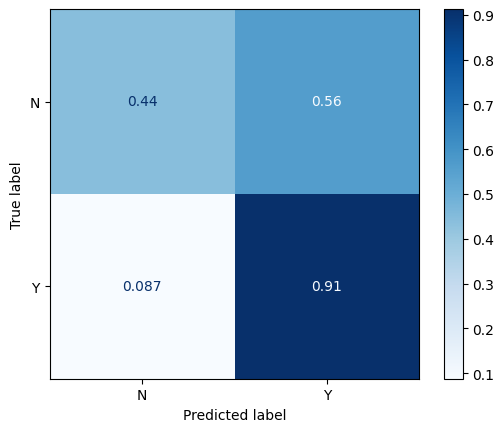

In [ ]:
## EVALUATING THE MODEL USING THE METRICS AND CONFUSION MATRIX
print(classification_report(y_test, test_preds))
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')

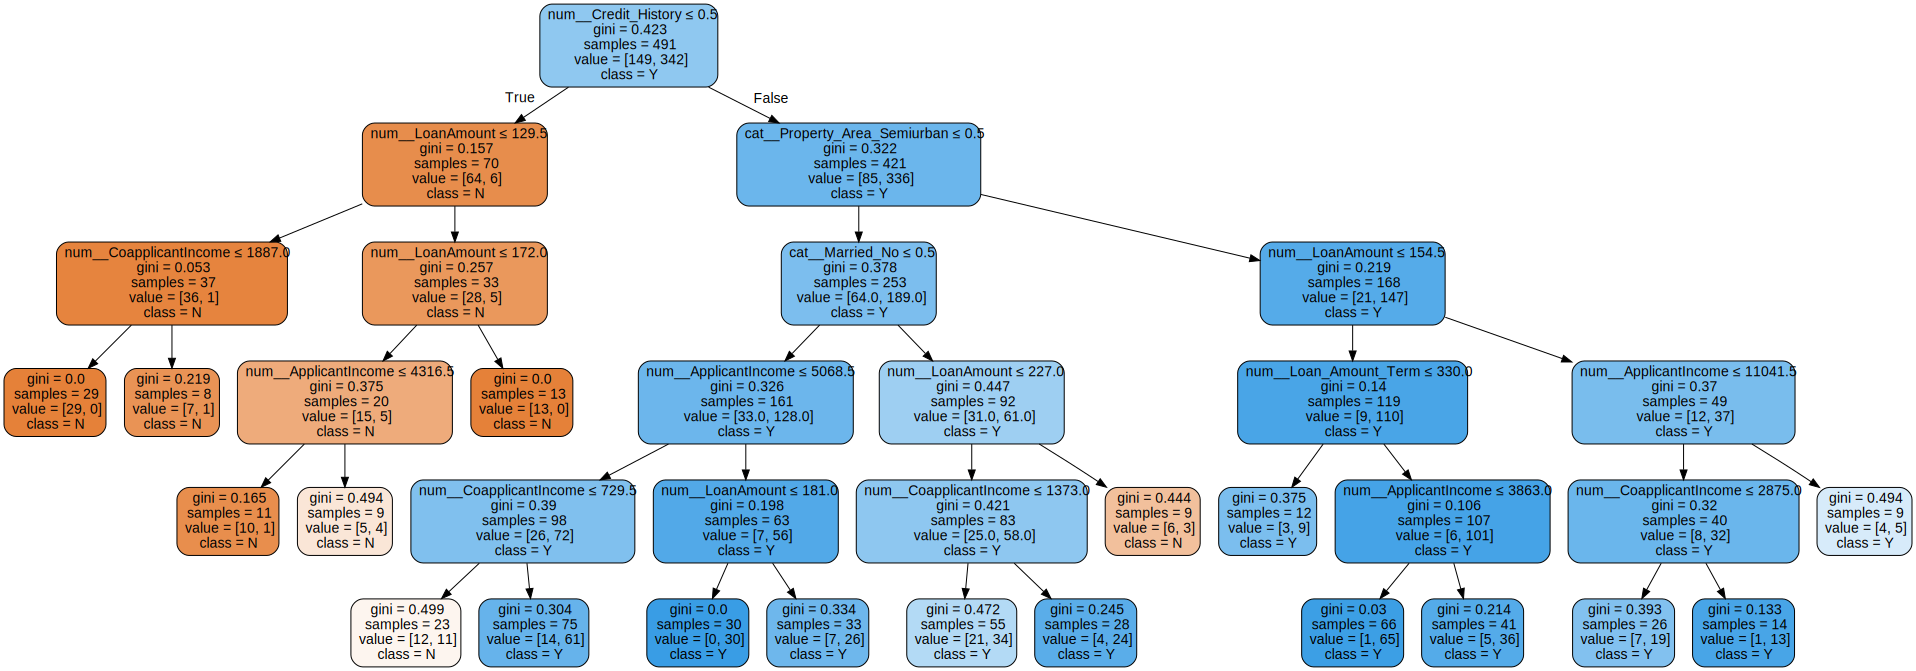

In [ ]:
###visualise the tree after tuning
from sklearn.tree import export_graphviz
import graphviz

# Get the best trained pipeline from GridSearchCV
tuned_pipeline = grid_search.best_estimator_

# Get the trained decision tree classifier from the tuned pipeline
tuned_tree = tuned_pipeline.named_steps['classifier']

# Get feature names from the preprocessor in the tuned pipeline
feature_names_tuned = tuned_pipeline.named_steps['preprocessor'].get_feature_names_out()

dot_data_tuned = export_graphviz(tuned_tree, out_file=None,
                         feature_names=feature_names_tuned,
                         class_names=['N', 'Y'],
                         filled=True, rounded=True,
                         special_characters=True)
graph_tuned = graphviz.Source(dot_data_tuned)
display(graph_tuned)

**HYPERPARAMETERS THAT LED TO THE BEST TUNED MODEL**


In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}
0.6897806978863509


##**TASK 2:SVM ALGORITHM**

## Support Vector Machine (SVM) Algorithm

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. Its primary objective is to find the optimal hyperplane that best separates data points from different classes in a high-dimensional space. This hyperplane is selected in such a way that it maximizes the margin,the distance between the closest data points from each class, known as support vectors,and the hyperplane itself.

When the data is not linearly separable, SVM employs a technique known as the "kernel trick." Kernel functions, such as the Radial Basis Function (RBF), Polynomial, or Sigmoid, allow SVM to map input features into a higher-dimensional space where a linear separation becomes feasible.

**Advantages of SVM:**

Effective in high-dimensional spaces: SVM performs well even when the number of features exceeds the number of observations, making it suitable for complex datasets.

Memory efficient: Only the support vectors (a subset of the training data) are used to define the decision boundary, reducing memory requirements.

Versatile with kernels: SVM’s flexibility in choosing kernel functions enables it to model a wide range of data distributions and decision boundaries.

Robust to outliers: Since only support vectors influence the decision function, the model is less affected by outliers compared to some other algorithms.

**Limitations of SVM:**

Computationally intensive on large datasets: SVMs can be slow and resource-heavy to train when working with very large datasets, particularly with complex kernels.

Requires careful tuning: The performance of SVM depends heavily on the appropriate selection of the kernel type and its parameters, often requiring trial and error or cross-validation.

Low interpretability: Compared to models like decision trees or linear regression, SVM models—especially those using non-linear kernels—are harder to interpret.

Sensitive to noise and overlapping classes: When the dataset is noisy or the classes significantly overlap, SVM performance may degrade as it struggles to find a clear margin.



In [ ]:
##BUILDING THE SVM CLASSIFIER
from sklearn.svm import SVC
# Define numerical and categorical features (re-defined for clarity within this block)
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Create transformers for preprocessing (re-defined for clarity within this block)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Include StandardScaler in the numerical pipeline
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Set sparse_output to False
])

# Create a column transformer to apply different transformations to different columns (re-defined for clarity)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Create the full pipeline including preprocessing and the SVM model
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))]) # Added random_state for reproducibility

# Train the SVM model
svm_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'Dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', SVC(random_state=42))])

In [ ]:
###testing the model
svm_test_preds = svm_pipeline.predict(x_test)


              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



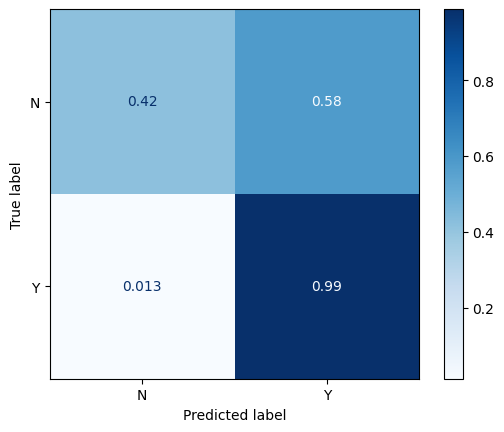

In [ ]:
# Evaluate the model using a classification report and confuaion matix
print(classification_report(y_test, svm_test_preds))
confusion_matrix(y_test, svm_test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, svm_test_preds, cmap='Blues',normalize='true')

**INTERPRETATION OF THE RESULTS**

Accuracy: The model has an overall accuracy of 0.79, or 79%. This means it correctly predicted the loan status for 79% of the cases in the test set.

**Precision:**

Class 'N' (Loan Not Approved): The precision is 0.95. This is a very high score, indicating that when the model predicts a loan will be rejected, it is correct 95% of the time. This is a significant improvement over the previous models.

Class 'Y' (Loan Approved): The precision is 0.76. This is a good score, meaning that when the model predicts a loan will be approved, it is correct 76% of the time.

**Recall:**

Class 'N': The recall is 0.42. This is a low score, meaning the model is only able to correctly identify 42% of all the actual loan rejections. This suggests the model is missing a large number of actual 'N' cases and is incorrectly classifying them as 'Y'.

Class 'Y': The recall is 0.99. This is an extremely high score, indicating that the model is very good at identifying approved loans, correctly finding 99% of all the actual 'Y' cases.

F1-Score:

Class 'N': The F1-score is 0.58, which is a balance between its high precision and low recall.

Class 'Y': The F1-score is 0.86, reflecting its strong performance in both precision and recall for this class.

In conclusion, the SVM model is very good at predicting loan approvals ('Y') with a near-perfect recall. It is also highly precise when predicting a loan rejection ('N'), but it struggles to identify all the actual rejections, as shown by its low recall for the 'N' class. This makes it a very conservative model for predicting rejections.

**TASK 3:RANDOM FOREST**

## Random Forest Algorithm

Random Forest is a powerful ensemble learning algorithm built on the foundation of decision trees. Its core idea is to combine the predictions of multiple decision trees to create a model that is more accurate, stable, and resistant to overfitting than any single decision tree. The method relies on two key principles: bootstrap aggregating (bagging) and random feature selection.

The process begins with bagging, where multiple subsets of the training data are created by sampling with replacement. This means each subset may contain duplicate instances, and some data points from the original training set may be left out. Each subset is used to train a separate decision tree. Unlike standard decision trees, Random Forest introduces additional randomness by selecting only a random subset of features at each split. This reduces the correlation between trees and enhances the diversity of the ensemble, which is critical for effective averaging.

Each tree in the forest is built independently using its own bootstrap sample and random feature splits. Once all trees are trained, their predictions are aggregated to form the final output. In classification tasks, the final prediction is determined by majority vote across all trees, while in regression tasks, it is the average of the individual tree predictions. This aggregation of diverse models helps smooth out individual tree errors and improves the model’s generalization ability.


**Advantages of Random Forest:**

High Accuracy: Performs well on a wide range of classification and regression tasks.

Reduces Overfitting: Bagging and feature randomness reduce the risk of overfitting.

Handles Non-linearity: Can capture complex, non-linear relationships in data.

Feature Importance: Provides insights into which features are most influential.

Robust to Outliers: Less sensitive to extreme values compared to individual decision trees.

Handles Missing Values: Can handle datasets with missing data depending on implementation

**Disadvantages of Random Forest:**

Less Interpretable: Difficult to interpret compared to a single decision tree.

Computationally Expensive: Training many trees takes more time and processing power.

High Memory Usage: Requires more memory to store multiple trees.

Bias Toward Features with Many Categories: Can favor categorical variables with many levels.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
numerical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='median')),
   ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
 ])
preprocessor = ColumnTransformer(

    transformers=[
         ('num', numerical_transformer, numerical_features),
         ('cat', categorical_transformer, categorical_features)
    ])


# Create the full pipeline including preprocessing and the Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))]) # Added random_state for reproducibility

# Train the Random Forest model
rf_pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'Dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
##Testing thhe model
rf_test_preds = rf_pipeline.predict(x_test)
rf_test_preds

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

              precision    recall  f1-score   support

           N       0.86      0.42      0.56        43
           Y       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



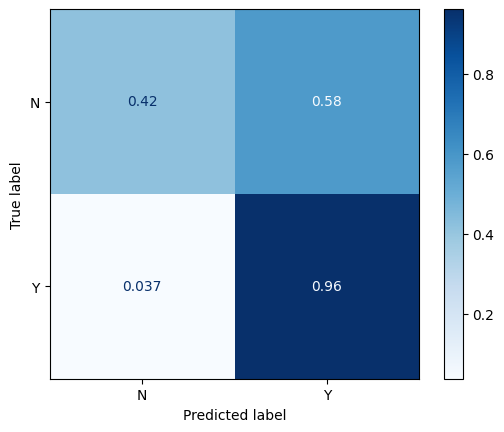

In [ ]:
# Evaluate the model using a classification report
print(classification_report(y_test, rf_test_preds))

# Evaluate the model using a confusion matrix
cm = confusion_matrix(y_test, rf_test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_preds, cmap='Blues', normalize='true')

**INTERPRETATION OF RESULTS**

Accuracy: The model has an overall accuracy of 0.77, or 77%. This means it correctly predicted the loan status for 77% of the cases in the test set.

**Precision:**

Class 'N' (Loan Not Approved): The precision is 0.86. This is a high score, indicating that when the model predicts a loan will be rejected, it is correct 86% of the time.

Class 'Y' (Loan Approved): The precision is 0.75. This is a good score, meaning that when the model predicts a loan will be approved, it is correct 75% of the time.

**Recall:**

Class 'N': The recall is 0.42. This is a low score, meaning the model is only able to correctly identify 42% of all the actual loan rejections. This suggests the model is missing a large number of actual 'N' cases and is incorrectly classifying them as 'Y'.

Class 'Y': The recall is 0.96. This is a very high score, indicating that the model is very good at identifying approved loans, correctly finding 96% of all the actual 'Y' cases.

**F1-Score **


Class 'N': The F1-score is 0.56, which is a balance between its high precision and low recall.

Class 'Y': The F1-score is 0.85, reflecting its strong performance in both precision and recall for this class.

In conclusion, the Random Forest model, is highly effective at identifying loan approvals ('Y') with a very high recall. It also has a good precision when predicting rejections ('N'). However, a key weakness is its low recall for the 'N' class, meaning it struggles to find all of the loans that were actually rejected.




##TASK 4:LOGISTIC REGRESSION**

**USING THE BREAST CANCER DATASET FROM KAGGLE**

**Descriprtion of the dataset**

The Breast Cancer Dataset hosted on Kaggle is a powerful resource for researchers, data scientists, and machine learning enthusiasts looking to explore and develop predictive models for breast cancer diagnosis. This dataset, accessible via Kaggle, is designed for binary classification tasks to predict whether a breast tumor is benign or malignant. It provides a rich collection of features derived from digitized images of fine needle aspirates (FNA) of breast masses, making it an essential tool for advancing healthcare analytics and computational pathology. Below is a comprehensive, human-crafted description of the dataset, complete with examples and key highlights to make it engaging and informative.

**Overview**
The dataset originates from the Breast Cancer Wisconsin (Diagnostic) Data Set, a widely used benchmark in machine learning for medical diagnostics. It contains detailed measurements of cell nuclei from breast tissue samples, enabling the classification of tumors as either benign (non-cancerous) or malignant (cancerous). This dataset is particularly valuable for developing and testing machine learning models, such as logistic regression, support vector machines, or deep neural networks, to aid in early and accurate breast cancer detection.

Purpose: Binary classification to predict tumor type (benign or malignant).
Source: University of Wisconsin, provided through Kaggle.

##### Dataset Structure
The dataset comprises 569 instances (rows) and 32 columns, including an ID column, a diagnosis label, and 30 numerical features describing cell nuclei characteristics. Each instance represents a single breast mass sample, with features computed from digitized FNA images.
Key Columns:

ID: A unique identifier for each sample (e.g., 842302).
Diagnosis: The target variable, labeled as:
M (Malignant): Indicates a cancerous tumor.
B (Benign): Indicates a non-cancerous tumor.

Features (30 columns): Numerical measurements of cell nuclei, such as radius, texture, perimeter, and area, derived from image analysis.

Feature Categories:
The 30 features are grouped into three main categories based on the characteristics of cell nuclei:
Mean: Average values of measurements (e.g., mean radius, mean texture).
Standard Error (SE): Variability of measurements (e.g., standard error of radius, standard error of area).
Worst: Largest (worst) values of measurements (e.g., worst radius, worst smoothness).

Each category includes 10 specific measurements:

Radius (mean of distances from center to points on the perimeter)
Texture (standard deviation of grayscale values)
Perimeter
Area
Smoothness (local variation in radius lengths)
Compactness (perimeter² / area - 1.0)
Concavity (severity of concave portions of the contour)
Concave points (number of concave portions of the contour)
Symmetry
Fractal dimension ("coastline approximation" - 1)







In [ ]:
##loading the dataset  from google drive
df=pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
##changing labels of the diagonosis colunm using he label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
###Target and features
y=df['diagnosis']
x=df.drop('diagnosis',axis=1)




In [ ]:
##splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#

**DATA MODELLING**

In [ ]:

from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a default Logistic Regression classifier
default_lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the default Logistic Regression model
default_lr_pipeline.fit(x_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Make predictions on the test set
default_lr_preds = default_lr_pipeline.predict(x_test)
default_lr_preds



array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



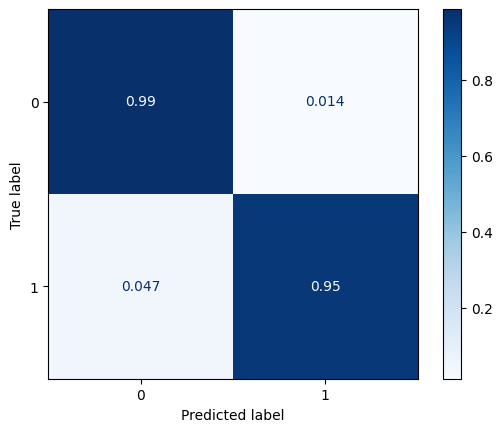

In [ ]:
# Evaluate the model using a classification report)
print(classification_report(y_test, default_lr_preds))
confusion_matrix(y_test, default_lr_preds)
ConfusionMatrixDisplay.from_predictions(y_test, default_lr_preds, cmap='Blues',normalize='true')


** Logistic Regression Model - Hyperparameter Tuning**


In [ ]:

from sklearn.linear_model import LogisticRegression


# Create a pipeline with a scaler and a Logistic Regression classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Define the parameter grid for LogisticRegression
param_grid = {
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'classifier__class_weight': [None, 'balanced']
}

# Create a GridSearchCV object
# Using 3 folds and optimizing for 'recall_macro'
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall_macro')

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                           1000, 10000],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='recall_macro')

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.9705174394319132


In [ ]:
##Testing the model
test_preds = grid_search.predict(x_test)
test_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



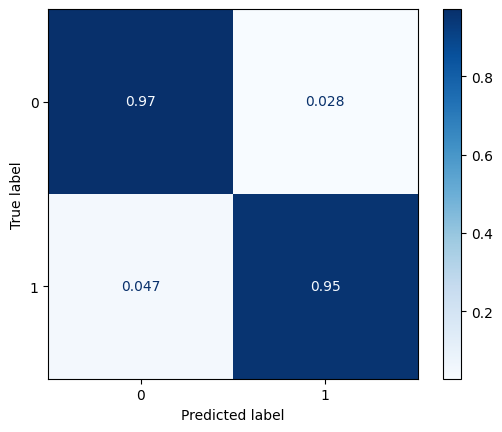

In [ ]:
##Evaluating the model using the evaluation metrics and the confusion matrix
print(classification_report(y_test, test_preds))
confusion_matrix(y_test, test_preds) # Renamed the variable to cm
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')

**HYPER PARAMETERS FOR THE BEST TUNED  MODEL**

classifier__C: 0.1

This is the inverse of regularization strength. The model found that a value of 0.1 provided the best balance between fitting the training data and avoiding overfitting. A smaller C means stronger regularization.

classifier__class_weight: None

The best model was achieved without any special class weighting. This suggests that the default weighting (where all classes are treated equally) performed better than trying to balance the classes.

classifier__penalty: 'l1'

The 'L1' penalty was chosen as the best regularization method. This type of penalty can lead to some feature coefficients being set to zero, which can be useful for feature selection and creating a simpler model.

classifier__solver: 'liblinear'

The liblinear solver was the best-performing algorithm for this hyperparameter combination. It is a good choice for smaller datasets and when using the 'l1' penalty.

The corresponding best_score_ of 0.9705 indicates a macro recall of approximately 97.05% for this combination of hyperparameters, which is a very strong result.

**INSIGHTS FROM THE DATA**


High Overall Accuracy:The logistic regression model achieved a high overall accuracy of 97% on the test set. This indicates that the model is generally very good at correctly classifying breast tumors as either benign or malignant.

Strong Recall for Both Classes: The model demonstrates strong recall for both the '0' (benign) class (99%) and the '1' (malignant) class (95%). This is particularly important in medical diagnosis, as it means the model is effective at identifying the majority of both benign and malignant cases, minimizing the number of false negatives (missing a malignant tumor) and false positives (incorrectly identifying a benign tumor as malignant).

## **TASK 5:UNSUPERVISED LEARNING**

In [ ]:
##IMPORTING LIBRARIES FOR UNSUPERVISED LEARNING
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [ ]:
##Loading the datset
data5=pd.read_csv('/content/drive/MyDrive/cust_seg.csv')
data5


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [ ]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [ ]:
# Dropping the Unnamed column, Customer Id column and the defaulted column
data5 = data5.drop(['Unnamed: 0', 'Customer Id', 'Defaulted'], axis=1)
display(data5.head())

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2


In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(data5)
scaled_df


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.442507
...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.502070
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.472288
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,3.458923
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-1.082817


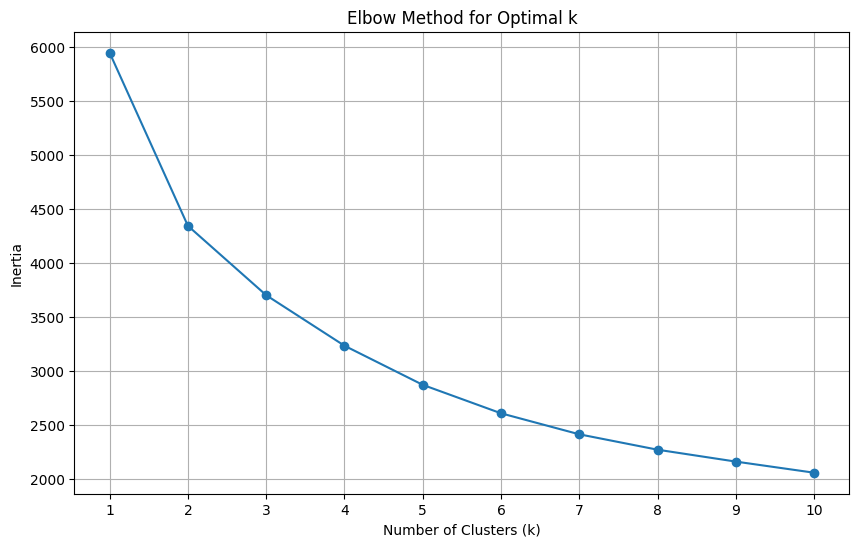

In [ ]:
##Calculate inertia for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Baseing o the elbow mthod,the optimal number of clusters is 3 and 4

In [ ]:
# Choose the number of clusters based on the elbow method
# Instantiate KMeans
kmeans = KMeans(n_clusters = 3, random_state=42, n_init=10) #kmeans algorithm: define k; data(X)
kmeans4= KMeans(n_clusters = 4, random_state=42, n_init=10)

#Fitting the Kmeans model
kmeans.fit(scaled_df)
kmeans4.fit(scaled_df)

# Add cluster labels to the original DataFrame
data5['Cluster_3'] = kmeans.labels_
data5['Cluster_4'] = kmeans4.labels_

In [ ]:
# Evaluate cluster quality using Silhouette Score for K-Means
silhouette_kmeans_3 = silhouette_score(scaled_df, data5['Cluster_3'])
silhouette_kmeans_4 = silhouette_score(scaled_df, data5['Cluster_4'])

print(f'Silhouette Score for K-Means (k=3): {silhouette_kmeans_3:.2f}')
print(f'Silhouette Score for K-Means (k=4): {silhouette_kmeans_4:.2f}')

Silhouette Score for K-Means (k=3): 0.23
Silhouette Score for K-Means (k=4): 0.24


After comparing the two Silhouette Scores,  the value for k=4 (0.24) is just slightly higher than that for k=3 (0.23). This suggests that using four clusters gives a slightly better grouping of the data compared to three. Although the difference isn’t huge, it seems that with four clusters, the data points are on average a bit more correctly assigned to their respective groups.

That said, both scores are quite low, which shows that clusters in this dataset aren’t very distinct or well-separated. So while k=4 appears to be a better choice based on the Silhouette Score alone, the improvement is minimal. This  means  the data might not naturally form clear clusters, and I’d probably need to do more analysis.

**Analytical visualizations that explore statistics for each feature for each cluster.**

/tmp/ipython-input-396153902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster_3', y=feature, data=data5, palette='viridis')


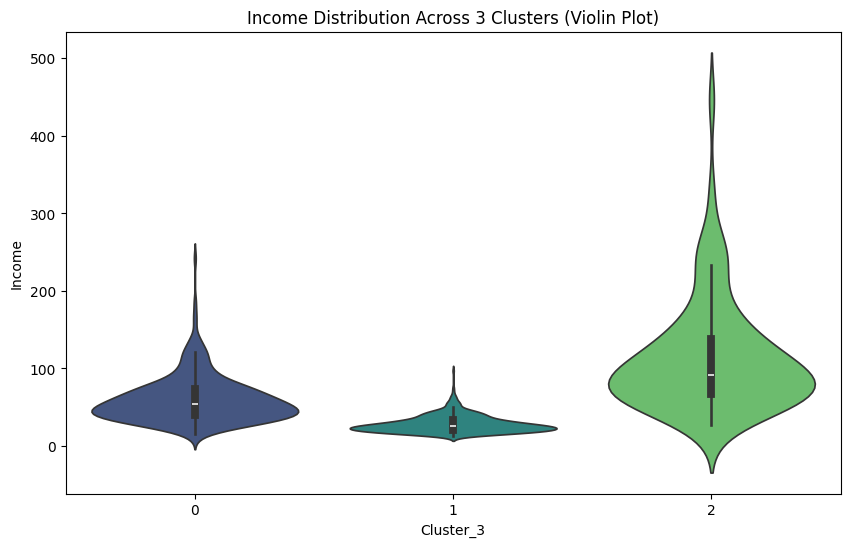

/tmp/ipython-input-396153902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster_3', y=feature, data=data5, palette='viridis')


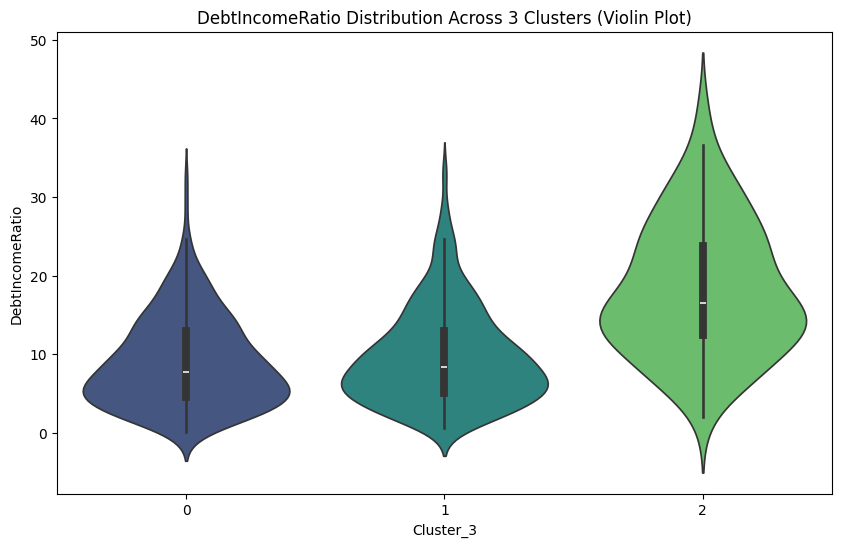

/tmp/ipython-input-396153902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster_3', y=feature, data=data5, palette='viridis')


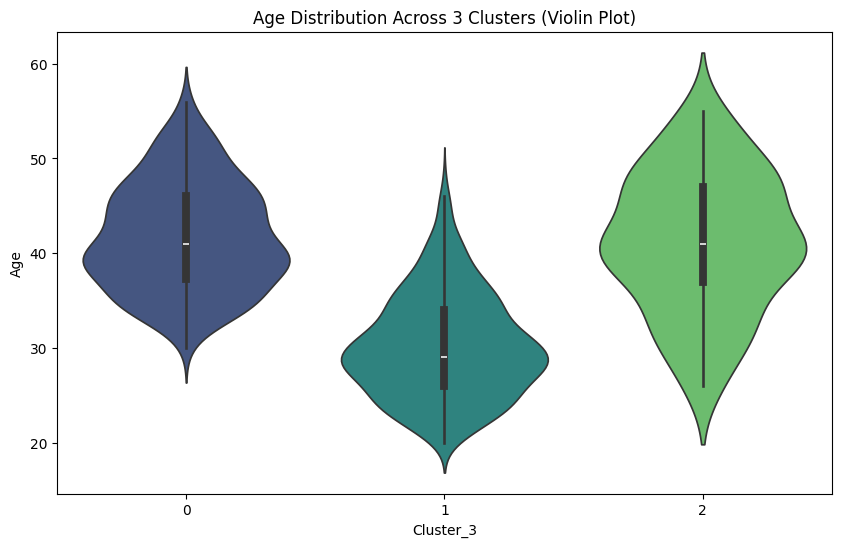

/tmp/ipython-input-396153902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster_3', y=feature, data=data5, palette='viridis')


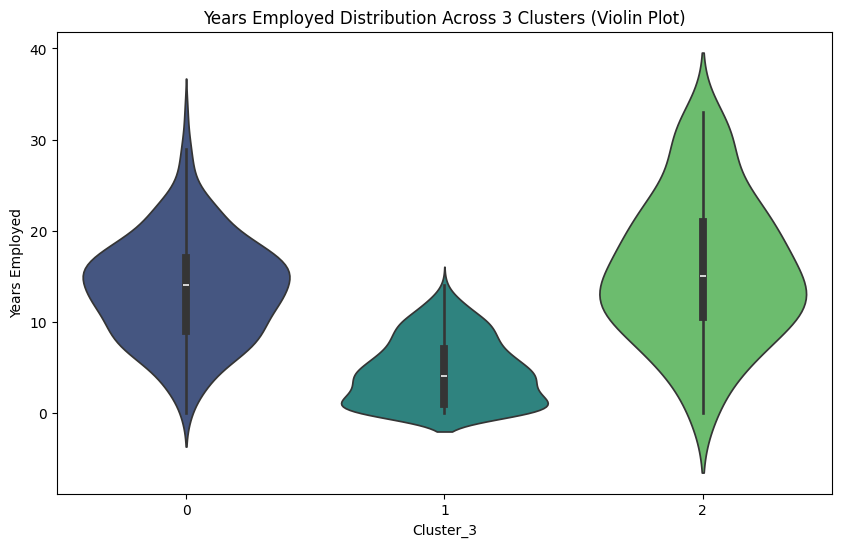

/tmp/ipython-input-396153902.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster_4', y=feature, data=data5, palette='viridis')


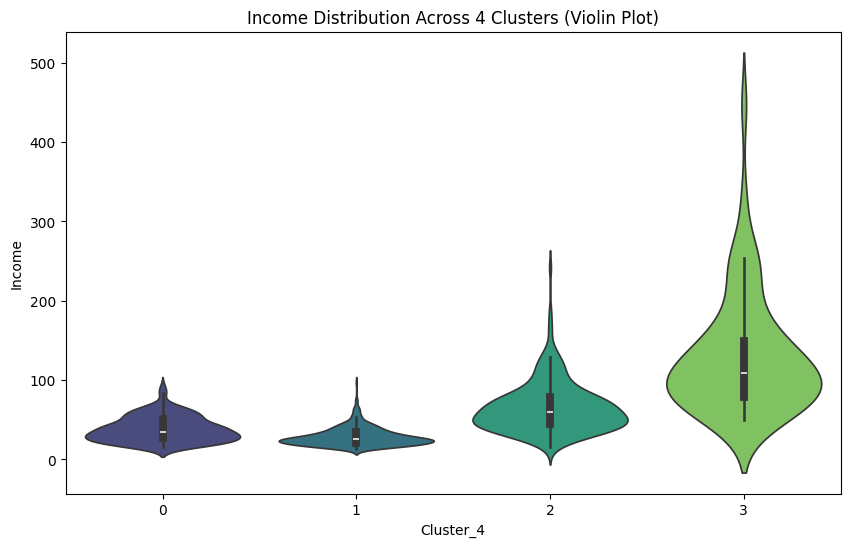

/tmp/ipython-input-396153902.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster_4', y=feature, data=data5, palette='viridis')


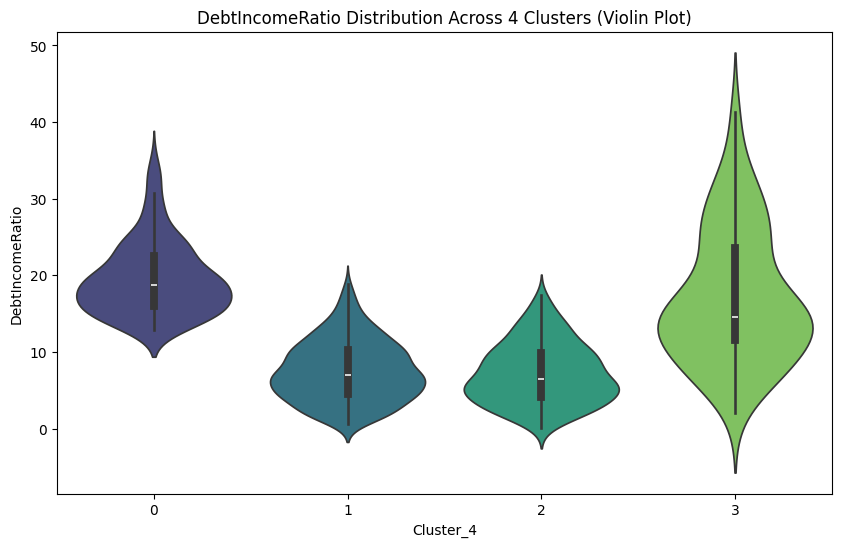

/tmp/ipython-input-396153902.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster_4', y=feature, data=data5, palette='viridis')


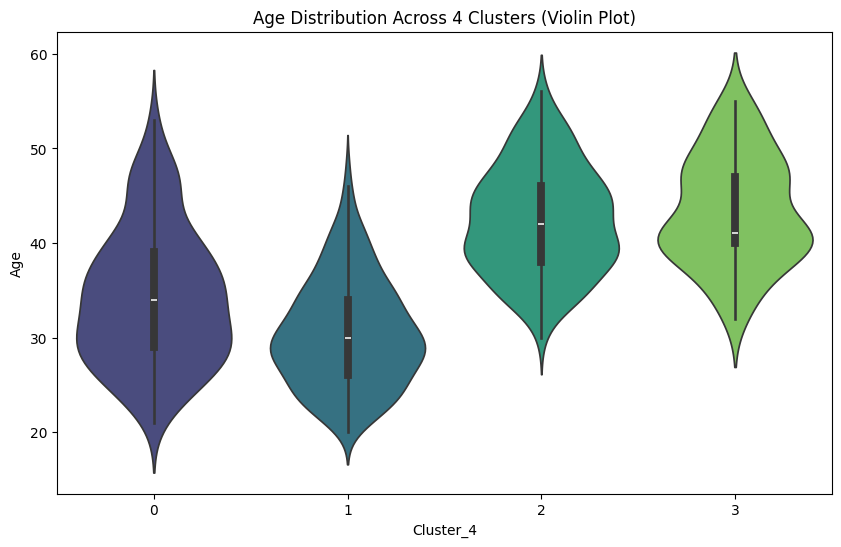

/tmp/ipython-input-396153902.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster_4', y=feature, data=data5, palette='viridis')


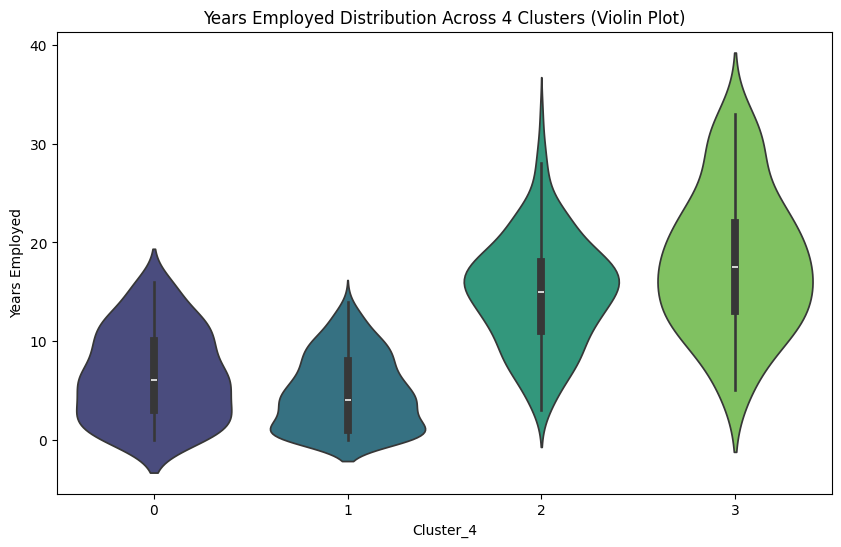

In [ ]:
# Visualize the clusters using violin plots for some key features (3 clusters)
features_to_visualize_violin = ['Income', 'DebtIncomeRatio', 'Age', 'Years Employed']

for feature in features_to_visualize_violin:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Cluster_3', y=feature, data=data5, palette='viridis')
    plt.title(f'{feature} Distribution Across 3 Clusters (Violin Plot)')
    plt.show()

# Visualize the clusters using violin plots for some key features (4 clusters)
for feature in features_to_visualize_violin:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Cluster_4', y=feature, data=data5, palette='viridis')
    plt.title(f'{feature} Distribution Across 4 Clusters (Violin Plot)')
    plt.show()



**For the 3-cluster**

Cluster 0 consists of younger individuals early in their careers with generally lower income and debt levels, showing some variability in age and employment length.

Cluster 1 represents very young customers with minimal income and debt, likely students or entry-level workers, characterized by tightly grouped low financial activity.

Cluster 2 is a more financially established group with higher income and debt, and a wider range of ages and professional experience.

**In the 4-cluster **

Cluster 0 includes customers with varying debt burdens relative to income, tending to be older with more employment years, possibly needing debt management support.

Cluster 1 mirrors the younger, low-income group seen in the 3-cluster model.

Cluster 2 represents a stable mid-level segment with moderate income, debt, and career experience.

Cluster 3 captures high-income, high-debt, older customers with more professional experience, potentially suitable for premium financial products but also higher risk.

**Conclusion**
Choosing between 3 or 4 clusters depends on the desired level of segmentation detail and business goals. The 3-cluster model offers broader groupings that may be easier to manage, while the 4-cluster model provides more granular insights, especially by separating higher-risk and higher-value customers. For targeted marketing or risk management strategies, the 4-cluster solution may be more effective, but for simpler customer segmentation, the 3-cluster model could suffice.


## Recommendations

**For 3 Clusters:**

Cluster 0 (Lower Income/Debt, Younger, Less Employed):

The crdeit card company can offer entry-level credit cards with low credit limits and minimal fees, focusing on credit-building features.
 They camn also provide financial literacy tools to support responsible credit use.

 Use digital marketing, social media, and partnerships with universities or employers, emphasizing simple, clear messaging.

Cluster 1 (Higher Income/Debt, Older, More Employed, Higher Default Risk):
For this target the credit card company  can offer  debt consolidation or management products.
 For customers with defaults,  they shouls consider secured or credit-building cards. For those with high income but debt, they should offer premium cards with careful risk assessment.They can also  use personalized offers, direct mail, financial advisory services, and collaborate with debt counseling programs.

Cluster 2 (Moderate Income/Debt, Mid-range Age/Employment):

The credit card company shouls use market standard credit cards featuring competitive rewards, balanced interest rates, and moderate limits.
They should consider reaching this stable group through a mix of digital and traditional channels, highlighting card benefits and rewards.

**For 4 Clusters:**

Cluster 0 (Lower Income/Debt, Younger, Less Employed, Lower Default Risk):
The credit card company should focus on credit-building products and educational content.

Use digital marketing and partnerships targeting younger demographics.

Cluster 1 (High Income/Debt, Older, More Employed, Higher Default Risk):

The credit card company should offer premium cards after rigorous credit checks.
Provide debt management and personalized financial guidance.

Use exclusive, personalized marketing and private banking channels, emphasizing wealth and risk management.

Cluster 2 (Moderate Income/Debt, Younger, Less Employed, Lower Default Risk):

The credit card  company should promote standard credit cards with attractive rewards. This group is likely financially responsible and can be engaged through a balanced mix of digital and traditional marketing focused on benefits.

Cluster 3 (Moderate Income/Debt, Older, More Employed, Higher Default Risk):


The credit card company should ffer cards with moderate credit limits or slightly higher interest rates.

Provide financial education and debt management tools to reduce default risk.

Use messaging that encourages responsible credit use and budgeting support, potentially partnering with financial wellness programs.

##Hierarchical clustering.

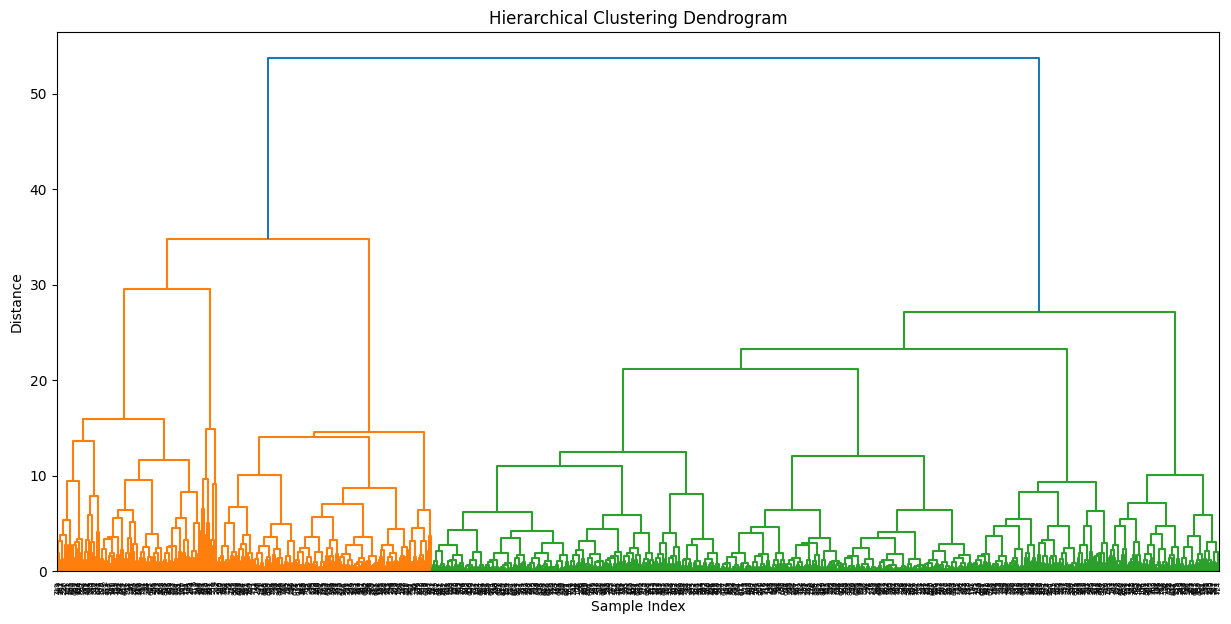

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

/tmp/ipython-input-882927940.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hierarchical_Cluster_3', y=feature, data=data5, palette='viridis')


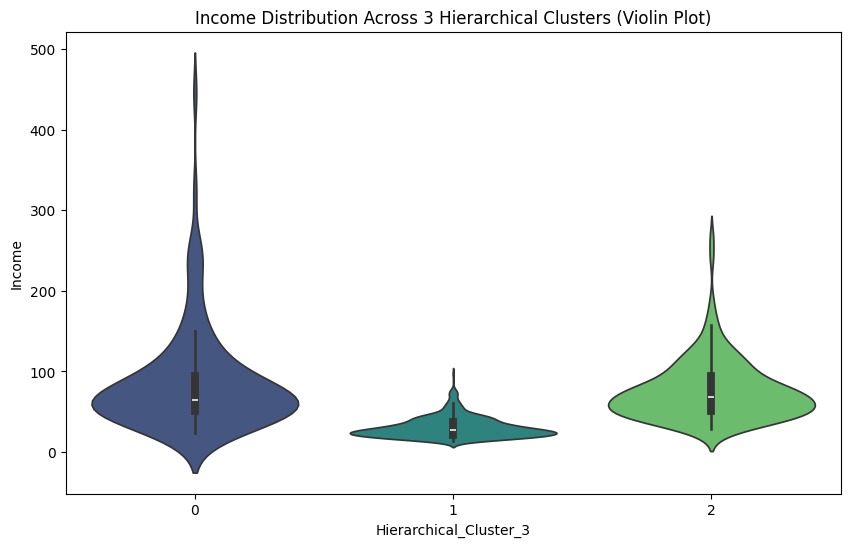

/tmp/ipython-input-882927940.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hierarchical_Cluster_3', y=feature, data=data5, palette='viridis')


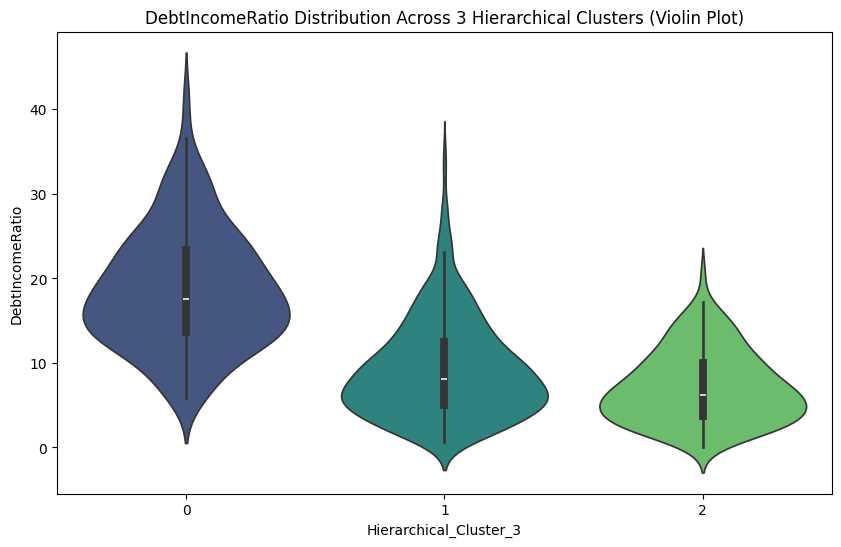

/tmp/ipython-input-882927940.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hierarchical_Cluster_3', y=feature, data=data5, palette='viridis')


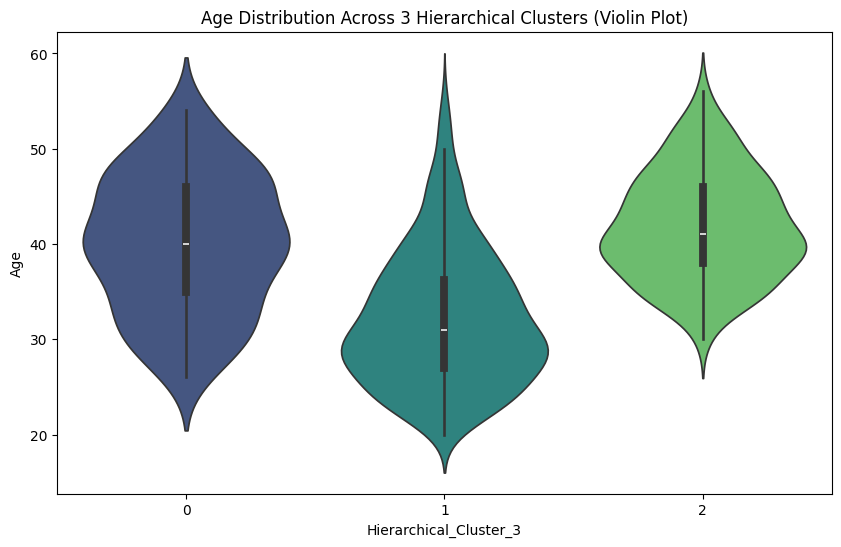

/tmp/ipython-input-882927940.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hierarchical_Cluster_3', y=feature, data=data5, palette='viridis')


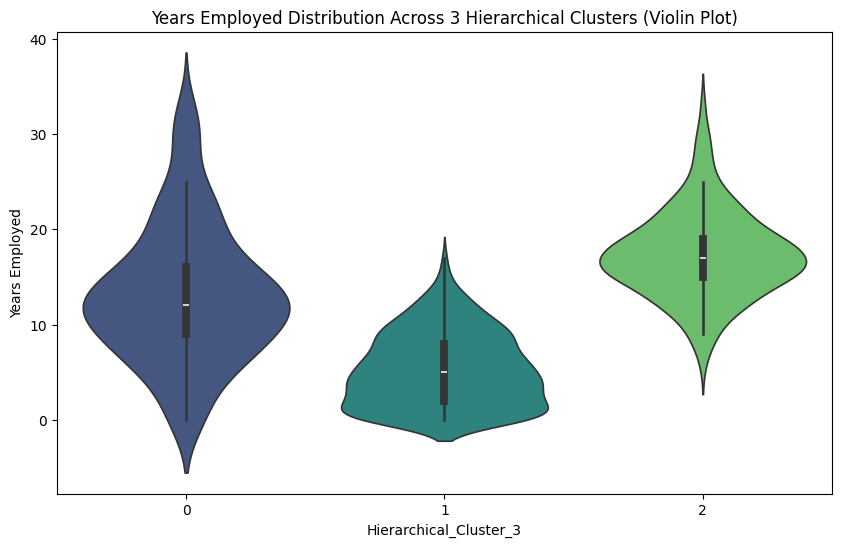

/tmp/ipython-input-882927940.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hierarchical_Cluster_4', y=feature, data=data5, palette='viridis')


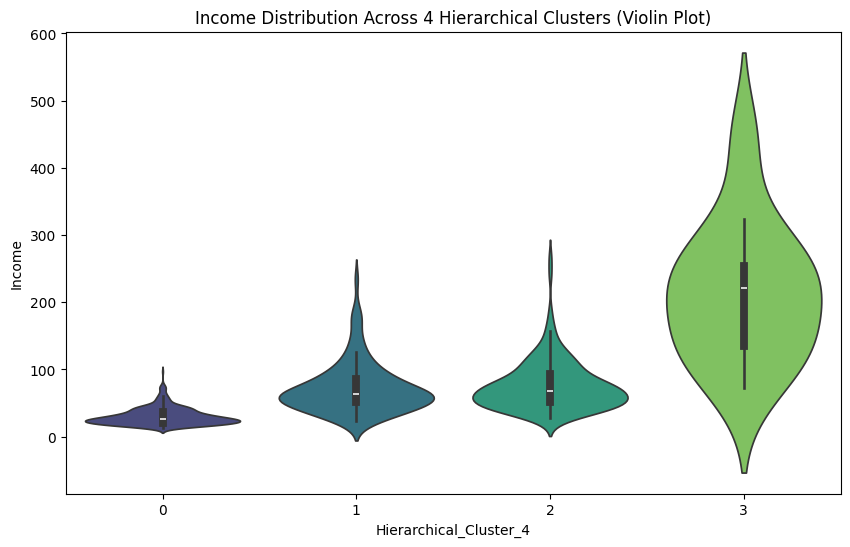

/tmp/ipython-input-882927940.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hierarchical_Cluster_4', y=feature, data=data5, palette='viridis')


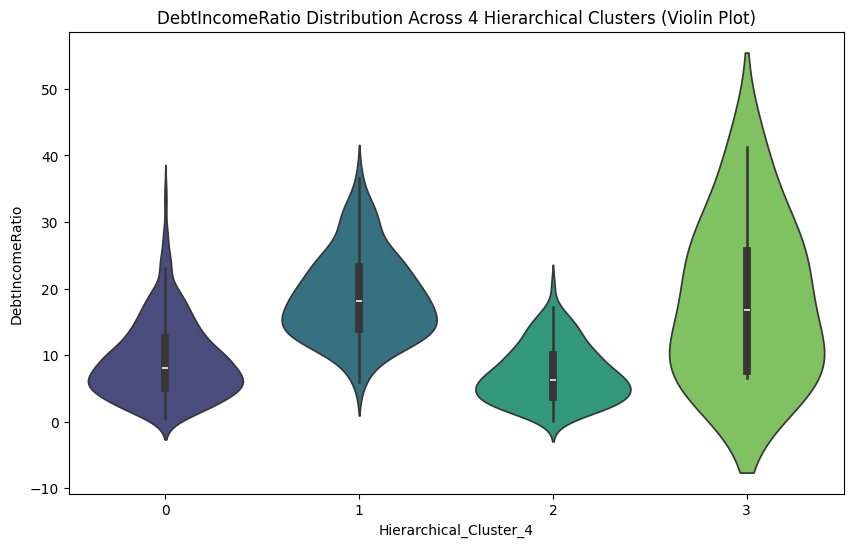

/tmp/ipython-input-882927940.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hierarchical_Cluster_4', y=feature, data=data5, palette='viridis')


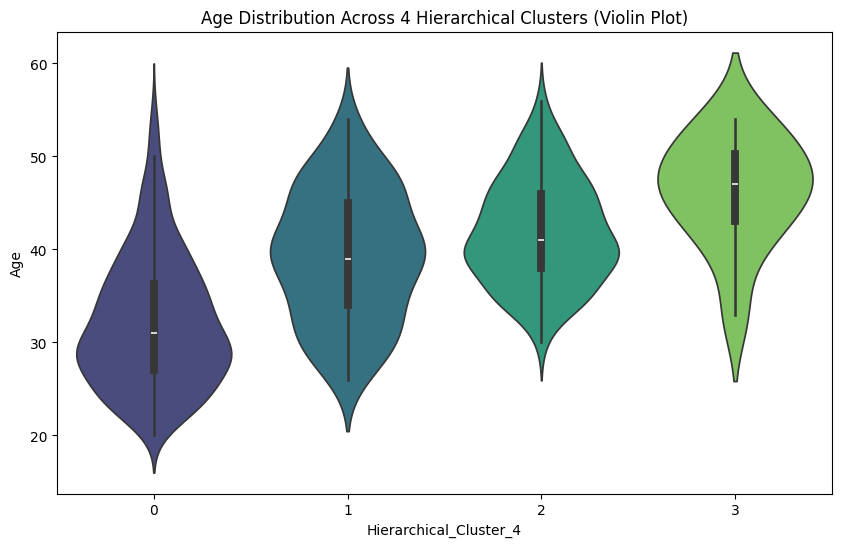

/tmp/ipython-input-882927940.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hierarchical_Cluster_4', y=feature, data=data5, palette='viridis')


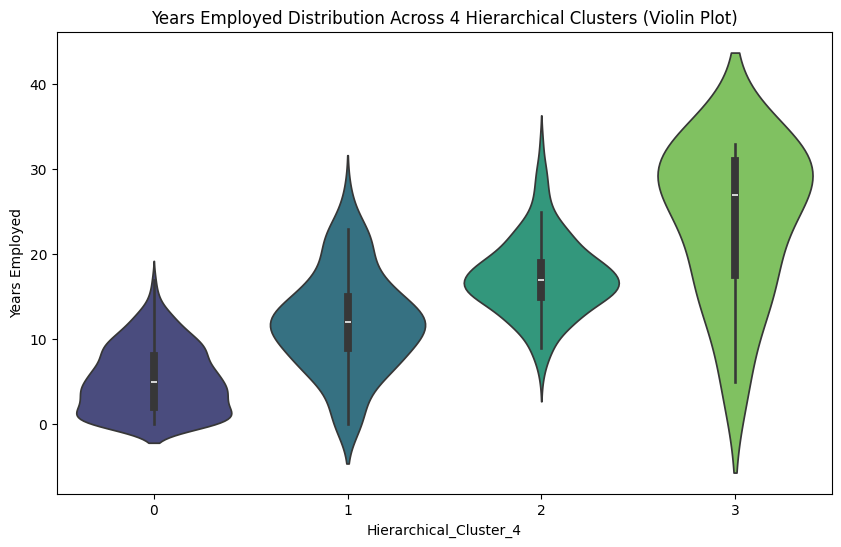

Hierarchical Cluster analysis for 3 clusters:


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Hierarchical_Cluster_3,,,,,,,
0,40.01,2.09,13.19,87.00,4.68,9.26,18.69
1,32.16,1.70,5.23,30.49,0.90,1.80,9.27
2,41.83,1.45,17.35,75.99,1.76,3.17,7.13



Hierarchical Cluster analysis for 4 clusters:


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Hierarchical_Cluster_4,,,,,,,
0,32.16,1.70,5.23,30.49,0.90,1.80,9.27
1,39.30,2.13,11.96,72.43,3.83,8.30,18.74
2,41.83,1.45,17.35,75.99,1.76,3.17,7.13
3,46.25,1.67,23.92,214.50,12.13,17.64,18.21


In [ ]:
# Apply Agglomerative Clustering with 3 clusters
agg_clustering_3 = AgglomerativeClustering(n_clusters=3)
data5['Hierarchical_Cluster_3'] = agg_clustering_3.fit_predict(scaled_df)

# Apply Agglomerative Clustering with 4 clusters
agg_clustering_4 = AgglomerativeClustering(n_clusters=4)
data5['Hierarchical_Cluster_4'] = agg_clustering_4.fit_predict(scaled_df)

# Visualize the hierarchical clusters using violin plots for key features (3 clusters)
features_to_visualize_violin = ['Income', 'DebtIncomeRatio', 'Age', 'Years Employed']

for feature in features_to_visualize_violin:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Hierarchical_Cluster_3', y=feature, data=data5, palette='viridis')
    plt.title(f'{feature} Distribution Across 3 Hierarchical Clusters (Violin Plot)')
    plt.show()

# Visualize the hierarchical clusters using violin plots for key features (4 clusters)
for feature in features_to_visualize_violin:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Hierarchical_Cluster_4', y=feature, data=data5, palette='viridis')
    plt.title(f'{feature} Distribution Across 4 Hierarchical Clusters (Violin Plot)')
    plt.show()

# Analyze the characteristics of each hierarchical cluster for 3 clusters
print("Hierarchical Cluster analysis for 3 clusters:")
display(data5.groupby('Hierarchical_Cluster_3').agg({
    'Age': 'mean',
    'Edu': 'mean',
    'Years Employed': 'mean',
    'Income': 'mean',
    'Card Debt': 'mean',
    'Other Debt': 'mean',
    'DebtIncomeRatio': 'mean'
}).round(2))

# Analyze the characteristics of each hierarchical cluster for 4 clusters
print("\nHierarchical Cluster analysis for 4 clusters:")
display(data5.groupby('Hierarchical_Cluster_4').agg({
    'Age': 'mean',
    'Edu': 'mean',
    'Years Employed': 'mean',
    'Income': 'mean',
    'Card Debt': 'mean',
    'Other Debt': 'mean',
    'DebtIncomeRatio': 'mean'
}).round(2))

##Data Description

**For 3 Clusters:**

Cluster 0: A diverse group showing wide variation in income, debts, age, and years employed, mostly younger to middle-aged with mixed financial profiles and experience.

Cluster 1: A tight cluster of younger individuals with low income and debt, early in their financial journeys, with limited work experience.

Cluster 2: More financially established individuals with higher income and debt, older and more experienced professionally.

**For 4 Clusters:**

Cluster 0: Younger, low-income, low-debt group

Cluster 1: Middle-income and debt group with varied debt-to-income ratios, generally middle-aged with more employment years.

Cluster 2: A stable, mature segment with moderate income and debt, tending toward older ages and longer employment.

Cluster 3: High-income, high-debt individuals, older and professionally experienced, with the widest financial variability.

